In [1]:
import os
os.chdir('../') # Go to the parent folder
from test_functions import *
from AnomalyDataClass import * # Functions to extract parameters of each data files 
from support_functions import *

Using TensorFlow backend.


Start the Anomaly Detection with Deep Autoencoder and Reconstruction Error: 
Below is a summery of the autoencoder model: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 504)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 252)               127260    
_________________________________________________________________
dense_2 (Dense)              (None, 126)               31878     
_________________________________________________________________
dense_3 (Dense)              (None, 63)                8001      
_________________________________________________________________
dense_4 (Dense)              (None, 31)                1984      
_________________________________________________________________
dense_5 (Dense)              (None, 62)                1984      
___________________

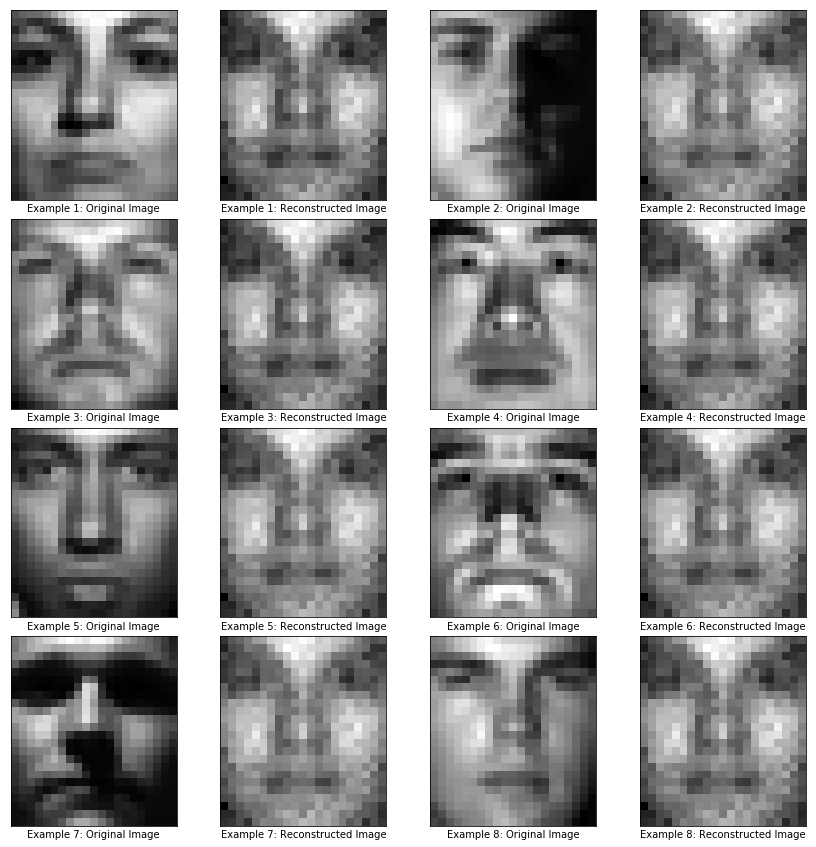

Below is a scatter plot that ranks the data points according to their Reconstruction Errors.
The higher the reconstruction error, the more likely the point will be detected as an anomaly
The Black Points are True Anomalies, while the others are True Normal points


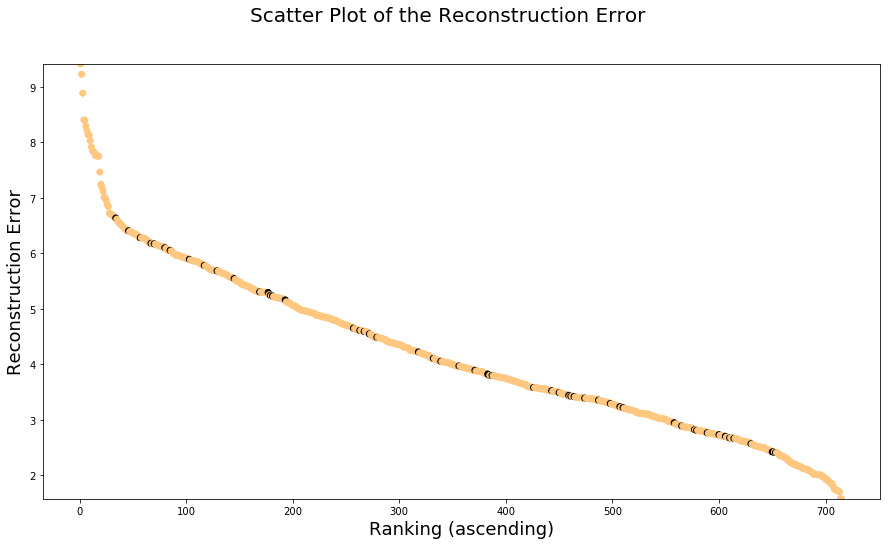


Training Results:
Precision: 8.1%
Recall: 100.0%
F-score: 15.0%
R-Precision (# R = 53): 3.8%
Precision@10: 0.0%

Testing Results:
Precision: 6.1%
Recall: 90.9%
F-score: 11.1%
R-Precision (# R = 11): 0.0%
Precision@10: 0.0%



In [2]:
read_and_detect(get_yale_faces_data,detection_with_autoencoder_reconstruction_error, to_print = True)